In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('gdrive/My Drive/major_project/small/insurance_claims.csv')
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
df.shape

(1000, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

N    753
Y    247
Name: fraud_reported, dtype: int64


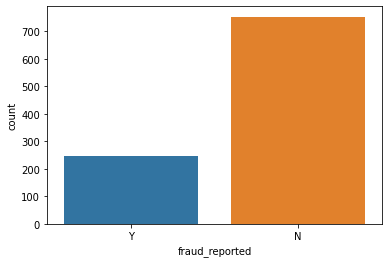

In [8]:
print(df['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported', data=df)

Imbalanced dataset.

In [9]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

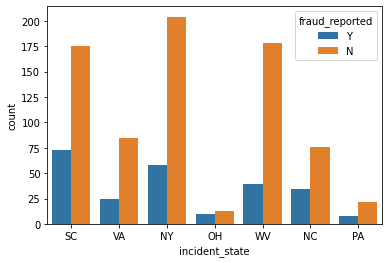

In [10]:
sns.countplot(x='incident_state', data=df, hue='fraud_reported')

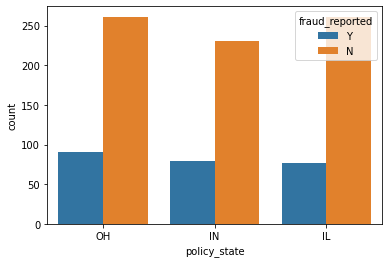

In [11]:
sns.countplot(x='policy_state', data=df, hue='fraud_reported')

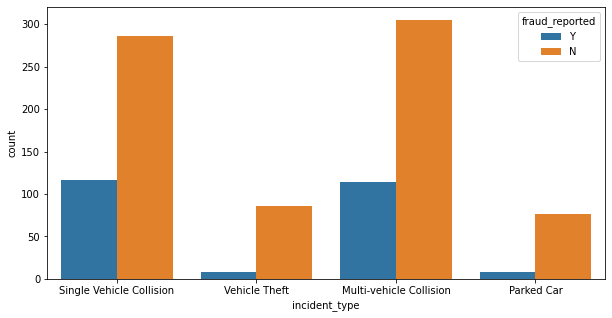

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_type', data=df, hue='fraud_reported')

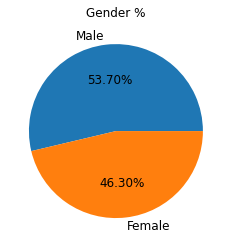

In [13]:
fig = plt.figure(figsize=(6,4))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.2f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('Gender %')
ax.set(ylabel='')
plt.show()

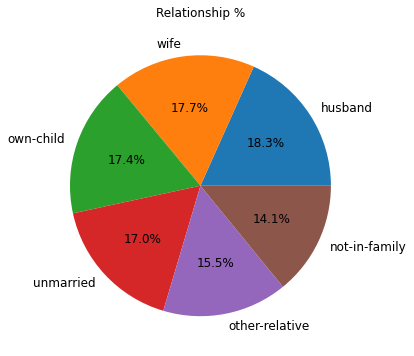

In [14]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%',labels = ['husband', 'wife', 'own-child', 'unmarried', \
                                     'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('Relationship %')
# Hide y-axis label
ax.set(ylabel='')
plt.show()

In [15]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [16]:
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [17]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [18]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [19]:
df.replace('?', np.nan, inplace = True)

In [20]:
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [21]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [22]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['policy_state'] = le.fit_transform(df['policy_state'])
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['collision_type'] = le.fit_transform(df['collision_type'])
df['incident_severity'] = le.fit_transform(df['incident_severity'])
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])

df['incident_state'] = le.fit_transform(df['incident_state'])
df['incident_city'] = le.fit_transform(df['incident_city'])
df['incident_location'] = le.fit_transform(df['incident_location'])
df['property_damage'] = le.fit_transform(df['property_damage'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['auto_model'] = le.fit_transform(df['auto_model'])
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

In [25]:
df.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,250/500,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2015-01-25,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,250/500,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,2015-01-21,3,1,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06,2,100/300,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,2015-02-22,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0


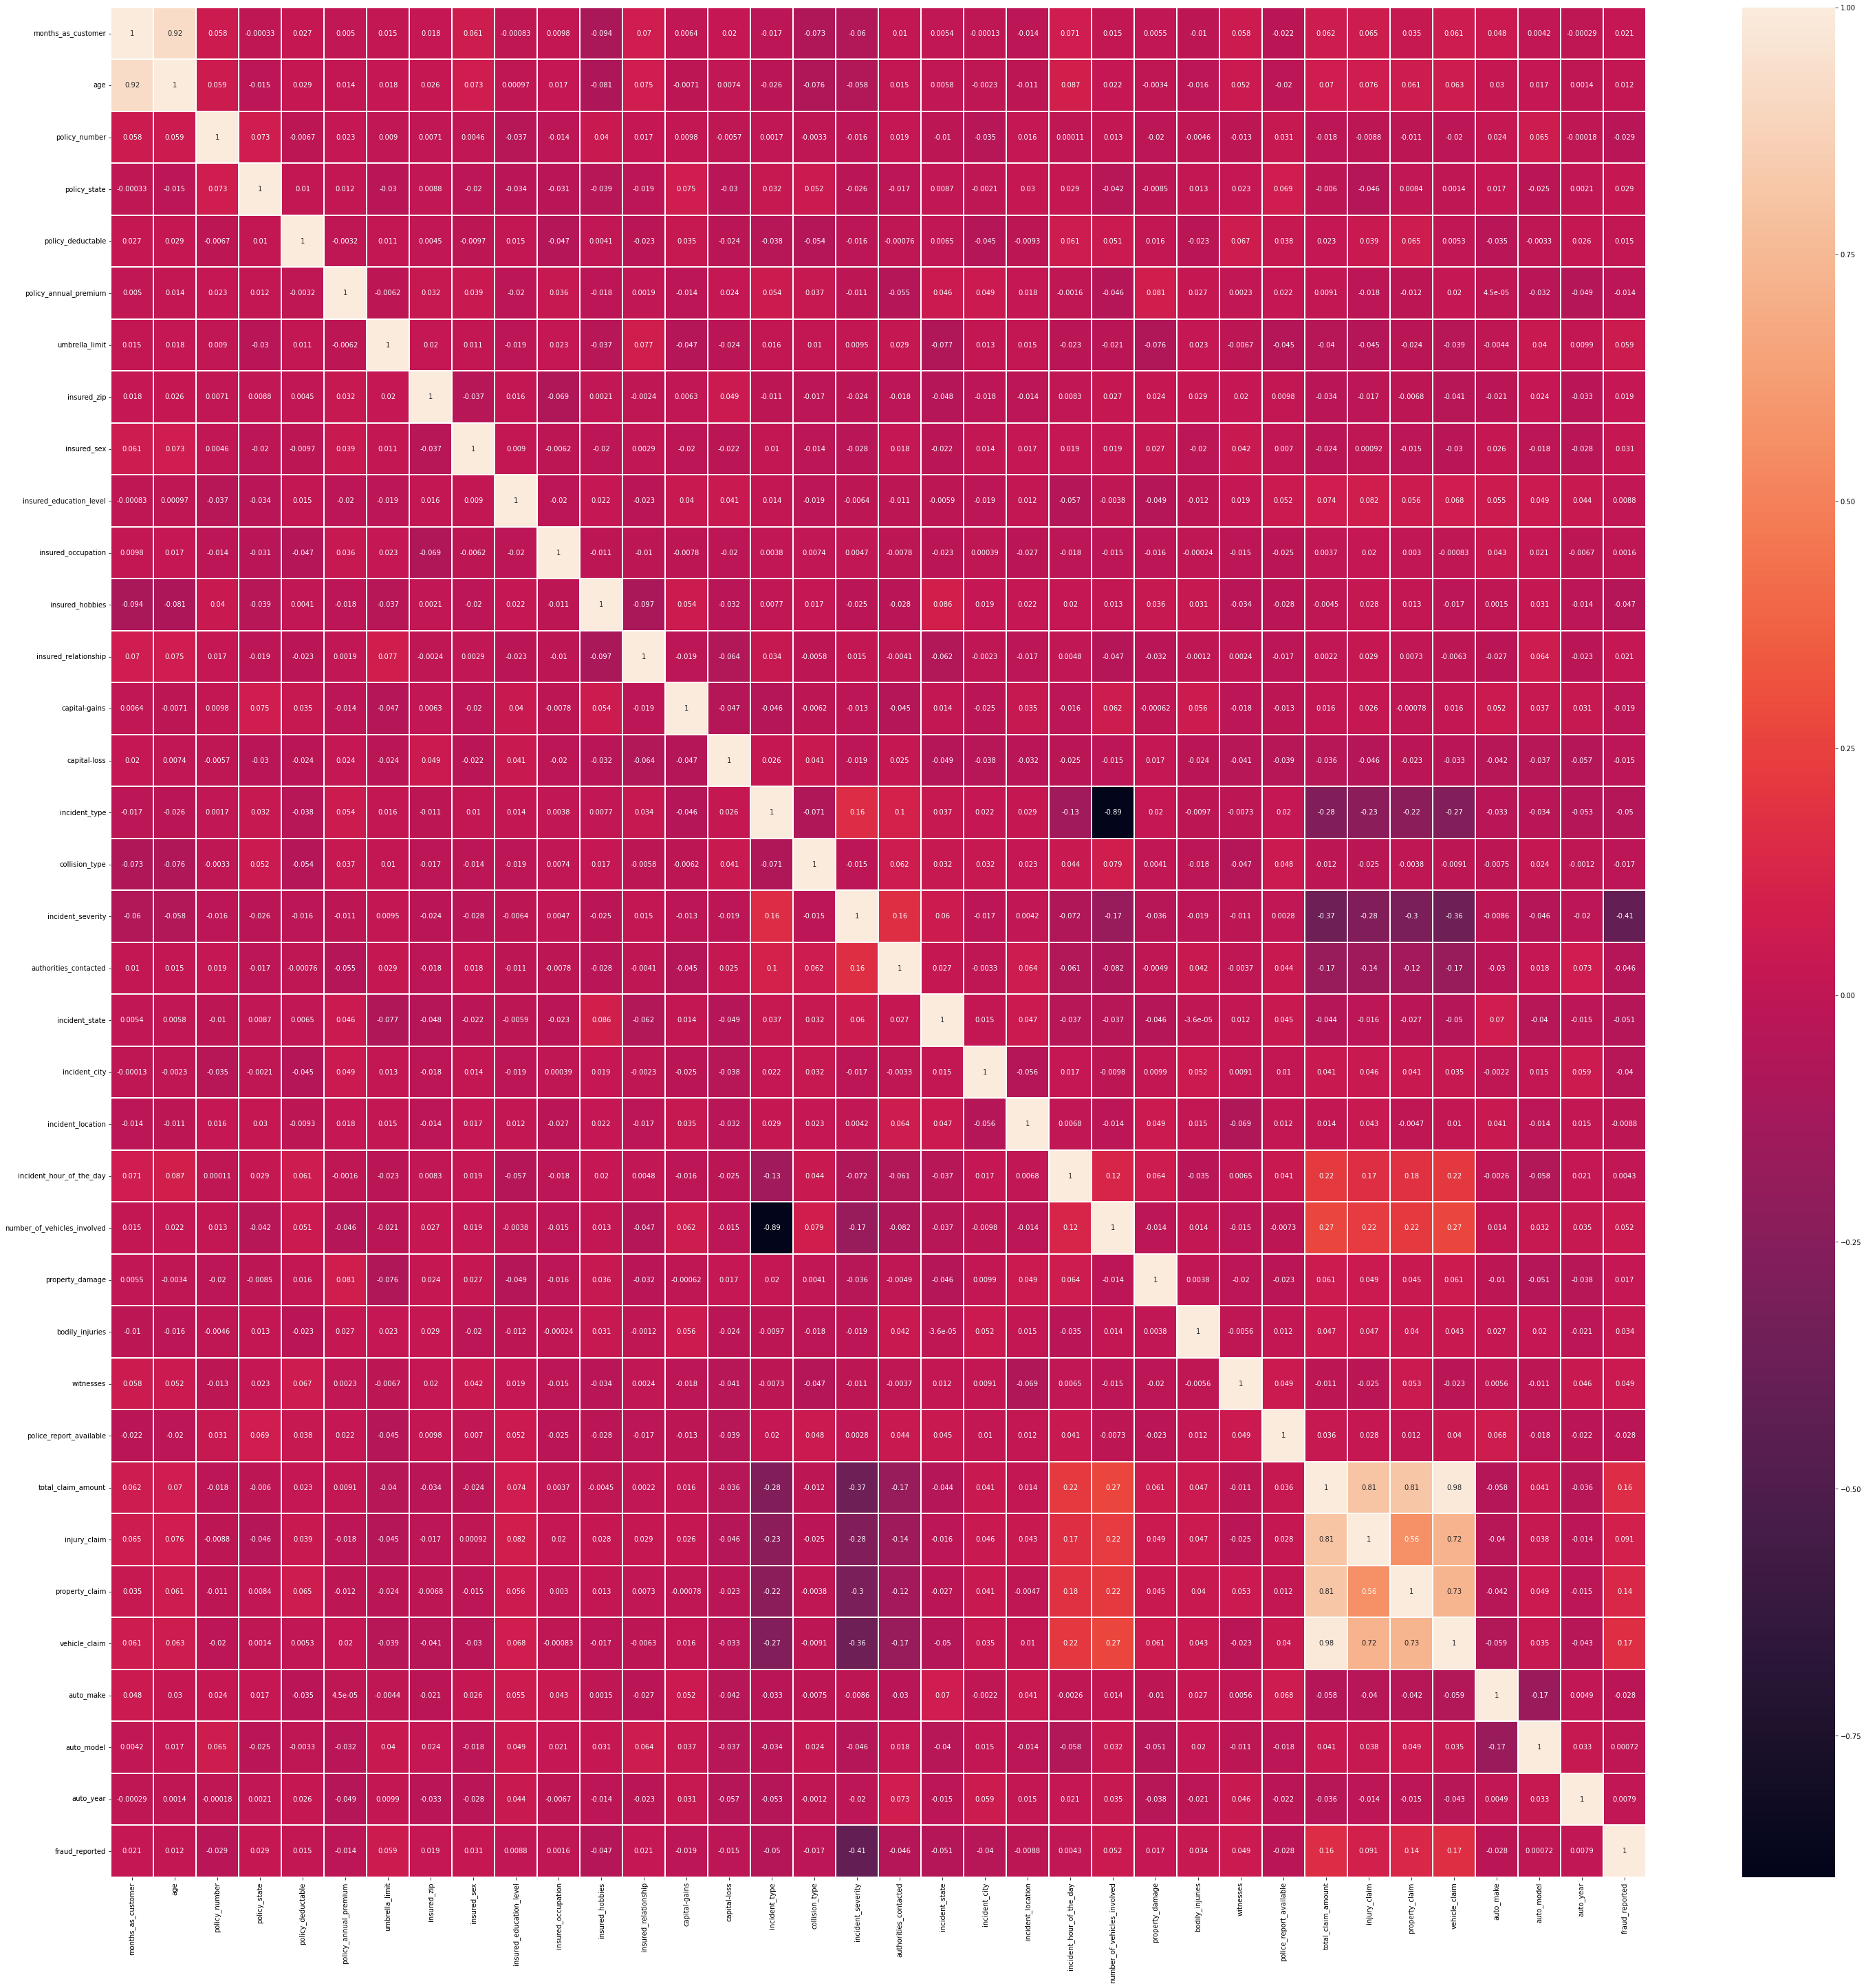

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize = (50, 50))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [27]:
corrs = df.corr()['fraud_reported']
columns = corrs[corrs > .001].index
corrs = corrs.filter(columns)
corrs.sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
Name: fraud_reported, dtype: float64

In [28]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [29]:
feat=['vehicle_claim','total_claim_amount','property_claim','injury_claim','umbrella_limit',\
'number_of_vehicles_involved', 'witnesses', 'bodily_injuries', 'insured_sex', 'policy_state',
'insured_relationship', 'months_as_customer', 'insured_zip', 'property_damage', 'policy_deductable',
'age', 'insured_education_level', 'auto_year', 'incident_hour_of_the_day', 'insured_occupation']

In [30]:
X = df[feat]
y = df.fraud_reported

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [42]:
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LogisticRegressionCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from numpy import mean
# from numpy import std

# # Model instance
# # models['Decision Tree'] = DecisionTreeClassifier(max_depth=10)
# # models['Random Forest'] = RandomForestClassifier(n_estimators=2000)
# # models['KNN'] = KNeighborsClassifier(5)
# # models['ADA'] = AdaBoostClassifier(n_estimators=500)
# # models['XGBoost'] = XGBClassifier()
# # models['Stacking'] = get_stacking()
# dt = XGBClassifier()
# dt.fit(X_train, y_train)

# y_pred = dt.predict(X_test)

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# dt_test_acc = accuracy_score(y_test, y_pred)

# print(f"Test accuracy of XGBClassifier is : {dt_test_acc}")

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Test accuracy of XGBClassifier is : 0.7266666666666667
[[214   6]
 [ 76   4]]
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       220
           1       0.40      0.05      0.09        80

    accuracy                           0.73       300
   macro avg       0.57      0.51      0.46       300
weighted avg       0.65      0.73      0.64       300



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [ ]:
y_train.value_counts()

0    533
1    167
Name: fraud_reported, dtype: int64

In [ ]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
np.bincount(y_train)

array([533, 533])

In [ ]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('DT', DecisionTreeClassifier(max_depth=10, random_state=5)))
    level0.append(('RF', RandomForestClassifier(n_estimators=2000)))
    level0.append(('KNN', KNeighborsClassifier(5)))
    level0.append(('ADA', AdaBoostClassifier(n_estimators=500)))
    level0.append(('XGB', XGBClassifier(objective= 'binary:logistic', eval_metric='logloss')))
    level1 = LogisticRegression(solver='lbfgs', max_iter=5000) 
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['Decision Tree'] = DecisionTreeClassifier(max_depth=10)
    models['Random Forest'] = RandomForestClassifier(n_estimators=2000)
    models['KNN'] = KNeighborsClassifier(5)
    models['ADA'] = AdaBoostClassifier(n_estimators=500)
    models['XGBoost'] = XGBClassifier()
    models['Stacking'] = get_stacking()
    return models

# get the models to evaluate
models = get_models()

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

Decision Tree 0.7045 (0.0511)
Random Forest 0.8364 (0.0326)
KNN 0.7061 (0.0393)
ADA 0.7185 (0.0306)
XGBoost 0.7833 (0.0324)
Stacking 0.8411 (0.0292)


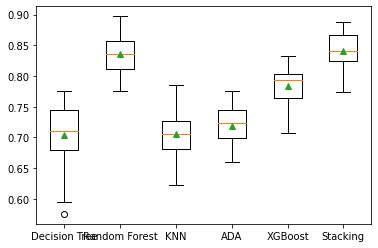

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
# make a prediction for one example
# data = [[52080,71610, 13020,6510,0,1,2,1,1,2,0,328]]

In [ ]:
import pickle
# Save trained model to file
pickle.dump(model, open("insurance_ml2.pkl", "wb"))

In [ ]:
!jupyter nbconvert --to html /content/gdrive/MyDrive/major_project/small/ML_small.ipynb

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/major_project/small/ML_small.ipynb to html
[NbConvertApp] Writing 1175206 bytes to /content/gdrive/MyDrive/major_project/small/ML_small.html
